<a href="https://colab.research.google.com/github/jkAtGitHub/New-York-Taxi/blob/master/NY_Taxi_Duration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install osmnx
!pip install geopandas

In [0]:
!apt-get install python3-rtree

In [0]:
!apt-get install graphviz


In [0]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon, MultiPolygon

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            return df

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/NYT/train.csv', parse_dates=["pickup_datetime", "dropoff_datetime"])

In [7]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


# Add pickup and dropoff location as Point geometry

In [8]:
pick_geometry = [Point(xy) for xy in zip(df.pickup_longitude, df.pickup_latitude)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=pick_geometry)
dropoff_geometry = [Point(xy) for xy in zip(df.dropoff_longitude, df.dropoff_latitude)]
gdf["drop_geometry"] = dropoff_geometry
gdf.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,geometry,drop_geometry
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,POINT (-73.98220062255859 40.74552154541016),POINT (-73.99491119384766 40.74016952514648)
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,POINT (-74.00094604492188 40.74737930297852),POINT (-73.97018432617188 40.79654693603516)
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,POINT (-73.95912933349609 40.768798828125),POINT (-74.00443267822266 40.70737075805664)
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,POINT (-73.98207855224609 40.74906158447266),POINT (-73.97463226318358 40.75710678100585)
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198,POINT (-73.9795379638672 40.7817497253418),POINT (-73.97280883789062 40.79058456420898)


In [0]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)

In [10]:
boros = boros.to_crs(epsg = 4326)
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((-74.05050806403247 40.5664220341607...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((-73.83668274106707 40.5949466970158...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((-73.86706149472118 40.5820879767934...
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((-74.01092841268031 40.6844914725429...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((-73.89680883223774 40.7958084451597...


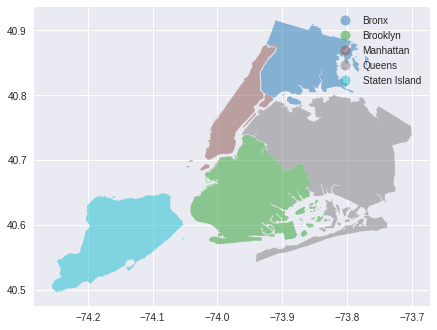

In [11]:
boros.plot(column="BoroName", legend = True, alpha = 0.5, )

In [12]:
for i, v in boros.iterrows():
    print(i, v["BoroName"], v["geometry"].area)

5 Staten Island 0.016045532498841275
4 Queens 0.030147563426067003
3 Brooklyn 0.019163078422753603
1 Manhattan 0.006307586115482834
2 Bronx 0.01177591275203844


In [0]:
from descartes import PolygonPatch

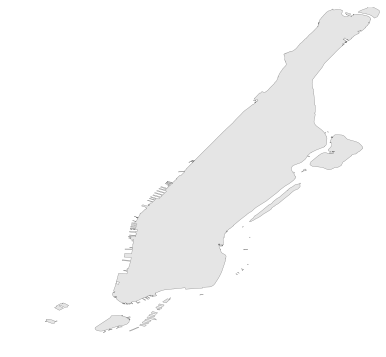

In [14]:
mp = boros.iloc[3]["geometry"]
west, south, east, north = mp.bounds
fig, ax = plt.subplots(figsize=(6,6))
for polygon in mp:
    patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha = 0.5, zorder=2)
    ax.add_patch(patch)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

## Cut geometry into quadrants

In [0]:
geometry_cut = ox.quadrat_cut_geometry(mp, quadrat_width=0.005)

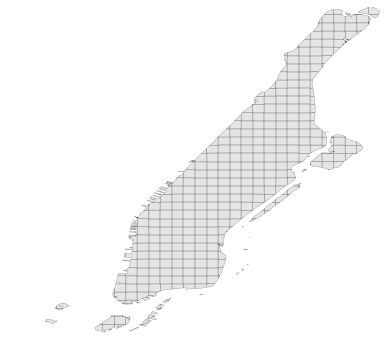

In [16]:
# plot the city
fig, ax = plt.subplots(figsize=(6,6))
for polygon in geometry_cut:
    patch = PolygonPatch(polygon, fc='#cccccc', ec='k', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [0]:
from multiprocessing import Pool, cpu_count
num_cores = cpu_count()

In [0]:
def return_matches(item):
    poly = item["geometry"]
    poly = poly.buffer(1e-14).buffer(0)
    possible_matches_index = list(pindex.intersection(poly.bounds))
    possible_matches = gdf.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(poly)]
    for key, value in item.items():
        if key != "geometry":
            precise_matches.iloc[:][key] = value
    return precise_matches    
    

def parallelize_dataframe(func, iterator):
    with Pool(num_cores) as pool:
        results = pd.concat(pool.map(func, iterator))
        return results       
       

In [20]:
%%time 

pickup_points_within_geometry = pd.DataFrame()
gdf.set_geometry("geometry", inplace=True)
pindex = gdf.sindex

for i, v in boros.iterrows():
    geometry = v["geometry"]
    boro_name = v["BoroName"]
    geometry_cut = ox.quadrat_cut_geometry(geometry, quadrat_width=0.005)
    l = len(geometry_cut)
    iterator = [{"pickup_boro_name": boro_name, "geometry" : geometry_cut[i]} for i in range(l)]
    pickup_points_within_geometry = pickup_points_within_geometry.append(parallelize_dataframe(return_matches, iterator))

CPU times: user 2min 1s, sys: 3.13 s, total: 2min 5s
Wall time: 3min 58s


In [21]:
%%time 

dropoff_points_within_geometry = pd.DataFrame()
gdf.set_geometry("drop_geometry", inplace=True)
pindex = gdf.sindex

for i, v in boros.iterrows():
    geometry = v["geometry"]
    boro_name = v["BoroName"]
    geometry_cut = ox.quadrat_cut_geometry(geometry, quadrat_width=0.005)
    l = len(geometry_cut)
    iterator = [{"dropoff_boro_name": boro_name, "geometry" : geometry_cut[i]} for i in range(l)]
    dropoff_points_within_geometry = dropoff_points_within_geometry.append(parallelize_dataframe(return_matches, iterator))        


CPU times: user 2min 6s, sys: 4.6 s, total: 2min 11s
Wall time: 4min 12s


In [0]:
dropoff_points_within_geometry.reset_index(drop = True, inplace=True)
pickup_points_within_geometry.reset_index(drop=True, inplace=True)

In [23]:
dropoff_points_within_geometry = dropoff_points_within_geometry[["id", "dropoff_boro_name"]]
merged_df = pd.merge(pickup_points_within_geometry, dropoff_points_within_geometry, on='id', how="inner")
display_all(merged_df.tail().T)

,1452049,1452050,1452051,1452052,1452053
id,id0434416,id0446131,id2807846,id0485626,id2435486
vendor_id,2,2,2,1,2
pickup_datetime,2016-02-28 19:39:47,2016-06-29 19:30:12,2016-01-18 17:15:37,2016-04-01 07:49:30,2016-06-04 03:43:55
dropoff_datetime,2016-02-28 19:49:06,2016-06-29 19:41:26,2016-01-18 17:33:36,2016-04-01 07:55:30,2016-06-04 04:00:18
passenger_count,1,3,1,1,1
pickup_longitude,-73.8319,-73.8316,-73.831,-73.8271,-73.8264
pickup_latitude,40.8821,40.8847,40.8705,40.8789,40.8619
dropoff_longitude,-73.8659,-73.8501,-73.8291,-73.8268,-73.8666
dropoff_latitude,40.8781,40.8304,40.8655,40.8533,40.7711
store_and_fwd_flag,N,N,N,N,N


In [0]:
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.76 # Earth radius in miles
    
    dLat, dLon, lat1, lat2 = np.radians(lat2 - lat1), np.radians(lon2 - lon1), \
    np.radians(lat1), np.radians(lat2)
    a =  np.sin(dLat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon/2) ** 2
    c = 2*np.arcsin(np.sqrt(a))
    
    return R * c

In [0]:
theta1 = np.radians(-28.904)
theta2 = np.radians(28.904)
R1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
R2 = np.array([[np.cos(theta2), np.sin(theta2)], [-np.sin(theta2), np.cos(theta2)]])

def manhattan_dist(lat1, lon1, lat2, lon2):
    p = np.stack([lat1, lon1], axis = 1)
    d = np.stack([lat2, lon2], axis = 1)
    pT = R1 @ p.T  
    dT = R1 @ d.T  

    vT = np.stack((pT[0,:], dT[1,:]))
    v = R2 @ vT
    return (haversine(p.T[0], p.T[1], v[0], v[1]) + haversine(v[0], v[1], d.T[0], d.T[1]))

In [0]:
raw_df = merged_df.query("pickup_latitude !=  dropoff_latitude &  pickup_longitude != dropoff_longitude & trip_duration > 250")
raw_df.reset_index(drop=True, inplace=True)

In [0]:
raw_df.iloc[:]["haversine_dist"] = haversine(raw_df["pickup_latitude"], raw_df["pickup_longitude"], raw_df["dropoff_latitude"], raw_df["dropoff_longitude"])
raw_df.iloc[:]["manhattan_dist"] = manhattan_dist(raw_df["pickup_latitude"], raw_df["pickup_longitude"], raw_df["dropoff_latitude"], raw_df["dropoff_longitude"])

In [29]:
display_all(raw_df.head().T)

,0,1,2,3,4
id,id1311655,id3451204,id1703201,id2941347,id2103467
vendor_id,2,2,2,1,2
pickup_datetime,2016-01-03 04:26:13,2016-04-08 20:51:48,2016-02-14 10:43:05,2016-06-08 19:36:39,2016-04-28 15:14:01
dropoff_datetime,2016-01-03 04:38:54,2016-04-08 21:15:54,2016-02-14 11:10:15,2016-06-08 20:13:07,2016-04-28 15:27:31
passenger_count,3,1,5,2,1
pickup_longitude,-74.074,-74.0773,-74.0907,-73.7533,-73.8313
pickup_latitude,40.6379,40.6061,40.6282,40.5965,40.5801
dropoff_longitude,-74.1208,-73.9583,-73.7825,-73.9473,-73.8194
dropoff_latitude,40.6049,40.7172,40.6488,40.6324,40.6068
store_and_fwd_flag,N,N,N,N,N


In [0]:
!pip install "fastai==0.7.0"
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision

!pip install Pillow>=4.1.1
!pip install image

In [0]:
from fastai.imports import *
from fastai.structured import *

In [0]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [0]:
raw_df.trip_duration.iloc[:] = np.log(raw_df.trip_duration)

In [0]:
add_datepart(raw_df, 'pickup_datetime', time=True)
add_datepart(raw_df, 'dropoff_datetime', time=True)

In [37]:
raw_df.tail().T

,1296518,1296519,1296520,1296521,1296522
id,id0434416,id0446131,id2807846,id0485626,id2435486
vendor_id,2,2,2,1,2
passenger_count,1,3,1,1,1
pickup_longitude,-73.8319,-73.8316,-73.831,-73.8271,-73.8264
pickup_latitude,40.8821,40.8847,40.8705,40.8789,40.8619
dropoff_longitude,-73.8659,-73.8501,-73.8291,-73.8268,-73.8666
dropoff_latitude,40.8781,40.8304,40.8655,40.8533,40.7711
store_and_fwd_flag,N,N,N,N,N
trip_duration,6.32615,6.51323,6.98379,5.8861,6.89061
geometry,POINT (-73.8318634033203 40.88214874267577),POINT (-73.83158111572266 40.88471221923828),POINT (-73.83104705810547 40.87054061889648),POINT (-73.82709503173827 40.87891387939453),POINT (-73.82640075683594 40.86192321777344)


In [0]:
raw_df.drop(["geometry", "drop_geometry"], axis = 1, inplace= True)

In [0]:
train_cats(raw_df)


In [0]:
tdf, y, nas = proc_df(raw_df, y_fld = 'trip_duration')

In [64]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(tdf, y)
m.score(tdf,y)

0.955018252420425

In [65]:
tdf.tail().T

,1296518,1296519,1296520,1296521,1296522
vendor_id,2,2,2,1,2
passenger_count,1,3,1,1,1
pickup_longitude,-73.8319,-73.8316,-73.831,-73.8271,-73.8264
pickup_latitude,40.8821,40.8847,40.8705,40.8789,40.8619
dropoff_longitude,-73.8659,-73.8501,-73.8291,-73.8268,-73.8666
dropoff_latitude,40.8781,40.8304,40.8655,40.8533,40.7711
store_and_fwd_flag,1,1,1,1,1
pickup_boro_name,1,1,1,1,1
dropoff_boro_name,1,1,1,1,4
haversine_dist,1.7976,3.87376,0.36075,1.76916,6.62105


In [66]:

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 10000
n_trn = len(tdf)-n_valid
raw_train, raw_valid = split_vals(raw_df, n_trn)
X_train, X_valid = split_vals(tdf, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1286523, 43), (1286523,), (10000, 43))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m, X_train, y_train, X_valid, y_valid):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [68]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 12min 22s, sys: 1.04 s, total: 12min 23s
Wall time: 6min 19s
[0.13255941068600735, 0.29822315428114443, 0.9557856455730048, 0.7531569411320408]


In [0]:
df_trn, y_trn, nas = proc_df(raw_df, 'trip_duration', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [71]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.43189613285718886, 0.43534106106409093, 0.5579396199454063, 0.47398580565074866]


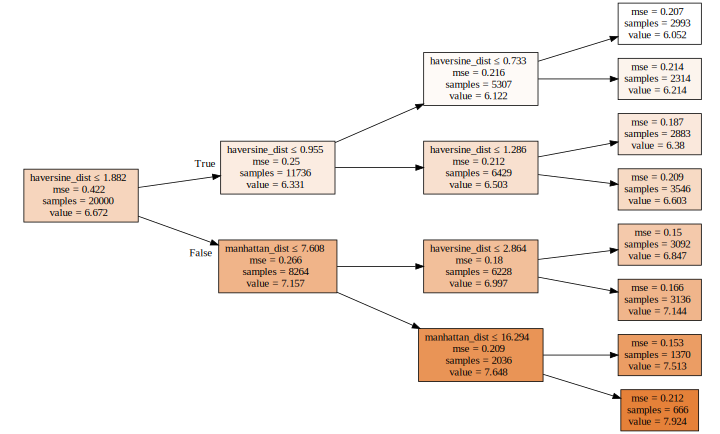

In [74]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [75]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.16802814991300247, 0.38024511827003715, 0.9330906126995481, 0.5987033863022302]


In [76]:

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([5.98896, 5.99146, 6.31536, 5.8693 , 6.11147, 6.36647, 5.79606, 7.07834, 7.54486, 6.04501]),
 6.310728437890559,
 5.808142489980444)

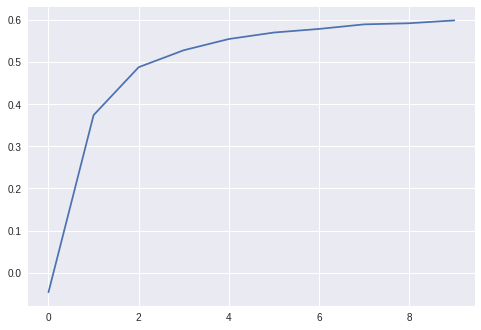

In [77]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [79]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.15517828555092011, 0.3679649861684756, 0.9429330238916961, 0.6242048323969247]


In [80]:
m = RandomForestRegressor(n_estimators=30, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.14535910013640277, 0.36004420806152193, 0.9499265616971848, 0.6402093619236675]


In [81]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.1457693852191841, 0.35814096948173896, 0.9496434919938014, 0.6440031046071885]


In [82]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.14423751536933474, 0.3628273755480439, 0.9506963096562295, 0.634625448246915, 0.6461613525826477]


In [83]:
df_trn, y_trn, nas = proc_df(raw_df, 'trip_duration')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.drop(ignore_flds, axis=1, inplace=True)


In [0]:
set_rf_samples(20000)

In [85]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 23.9 s, sys: 586 ms, total: 24.5 s
Wall time: 17.7 s
[0.3593521241744257, 0.353074414544494, 0.6750754010040978, 0.6540043043026624, 0.6653079217934195]


In [86]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.3432715682811139, 0.3306731127077387, 0.7035046905632757, 0.6965158824310607, 0.6942963311015942]


In [87]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 3min 19s, sys: 957 ms, total: 3min 20s
Wall time: 2min 18s
[0.34166383486352575, 0.32748525355033564, 0.706275494605366, 0.7023391632339581, 0.6970654758687367]


In [0]:
reset_rf_samples()

In [0]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [90]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 1h 2min 20s, sys: 8.03 s, total: 1h 2min 28s
Wall time: 32min 10s
[0.11463924543783029, 0.28397293273163127, 0.9669319339369783, 0.7761835030917646, 0.7634538627455449]


In [91]:
t=m.estimators_[0].tree_
dectree_max_depth(t)

61

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

In [0]:
t=m.estimators_[0].tree_
dectree_max_depth(t)

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

In [0]:
set_rf_samples(50000)
